In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Patch
plt.rcParams.update({'figure.dpi': 600})
plt.rcParams.update({'font.family': 'serif', 'font.serif': ['Times New Roman']})
from collections import Counter
from PIL import Image

In [2]:
data = pd.read_csv('/Users/ainsleylewis/Documents/Astronomy/arXiver/2025_Data.csv')
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,...,journals,num_checks,affiliations,total_citations,non_self_citations,journal_flag,journal_flag_with_submitted,smart_keywords,smart_keywords_2,latex_countries
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,...,"ApJ (2025), 980 183",0,"Wu, John F.: Space Telescope Science Institute...",3.0,1.0,1,1,"['Astronomers', 'Astronomical evolution', 'Ast...","['Galaxies (573)', 'Astronomy image processing...",NaN
1,X-ray reverberation black hole mass and distan...,We fit X-ray reverberation models to Rossi X-r...,"[""Patrick O'Neill"", 'Adam Ingram', 'Edward Nat...",16.0,18.0,1.0,arxiv.org/pdf/2501.12788,High Energy Astrophysical Phenomena,NaN,NaN,...,NaN,0,NaN,0.0,0.0,1,1,"['Accretion', 'Angular distance', 'Bayesian st...",['powered by accretion of matter from a compan...,"United Kingdom, United Kingdom, United Kingdom..."
2,The TES-based Cryogenic AntiCoincidence Detect...,The Cryogenic AntiCoincidence Detector (CryoAC...,"[""Matteo D'Andrea"", 'Claudio Macculi', 'Simone...",17.0,8.0,0.0,arxiv.org/pdf/2501.12781,Instrumentation and Methods for Astrophysics,NaN,IEEE Transactions on Applied Superconductivity...,...,NaN,0,"D'Andrea, Matteo: INAF/IAPS, 00133, Rome, Ital...",1.0,0.0,1,1,[],[],NaN
3,Massive star clusters in the gamma-ray sky: th...,Massive Star Clusters (SCs) have been proposed...,"['Giada Peron', 'Giovanni Morlino', 'Stefano G...",3.0,5.0,1.0,arxiv.org/pdf/2501.12767,High Energy Astrophysical Phenomena,NaN,NaN,...,NaN,0,NaN,0.0,0.0,0,0,"['Cosmic ray objects', 'Cosmic ray sources', '...","['Cosmic Rays 1', 'HII regions', 'Gamma rays',...","Italy, France"
4,The Impact of Bar-induced Non-Circular Motions...,We study the impact of bar-induced non-circula...,"['Jie Liu', 'Zhi Li', 'Juntai Shen']",12.0,19.0,1.0,arxiv.org/pdf/2501.12760,Astrophysics of Galaxies,NaN,NaN,...,NaN,0,"Liu, Jie: Shanghai Astronomical Observatory, C...",4.0,3.0,1,1,"['Disk galaxies', 'Galactic bar', 'Galaxies']",['galaxies: rotation curve - galaxies: fundame...,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18655,Cosmic Himalayas in CROCODILE : Probing the Ex...,The recently reported Cosmic Himalayas (CH) --...,"['Yuto Kuwayama', 'Yongming Liang', 'Kentaro N...",10.0,18.0,5.0,arxiv.org/pdf/2512.24966,Cosmology and Nongalactic Astrophysics,['Astrophysics of Galaxies'],NaN,...,NaN,0,"[None, None, None, None, None, None, None, Non...",0.0,0.0,0,1,"['Apparent anomaly', 'Clustering', 'Cosmologic...",['Hydrodynamicalsimulations(767)'],"Japan, Japan, Japan, Japan, Japan, Japan, Unit..."
18656,Multi-Frequency Study of FRB20201124A with the...,We present results from multi-epoch observatio...,"['C. Dudeja', 'J. Roy', 'U. Panda', 'S. Bhatta...",11.0,17.0,1.0,arxiv.org/pdf/2512.24978,High Energy Astrophysical Phenomena,NaN,NaN,...,NaN,0,"[None, None, None, None]",0.0,0.0,0,0,"['FRB', 'FRBs', 'Fast radio burst']",[],"India, India, India, India"
18657,Distributions of wide binary stars in theory a...,"Using the censored catalog of 103,169 resolved...",['Valeri V. Makarov'],7.0,13.0,1.0,arxiv.org/pdf/2512.25002,Solar and Stellar Astrophysics,NaN,NaN,...,NaN,0,[None],0.0,0.0,1,1,"['A stars', 'A type stars', 'A-type stars']",[],United States
18658,Towards precision cosmology with Voids x CMB c...,We construct and validate a set of multi-purpo...,"['Mar Pérez Sar', 'Carlos Hernández Monteagudo...",8.0,19.0,1.0,arxiv.org/pdf/2512.25040,Cosmology and Nongalactic Astrophysics,NaN,NaN,...,NaN,0,"[None, None, None, None]",0.0,0.0,0,1,"['CMB', 'Catalogs', 'Clustering']",['Cosmology: Large-scale structure - Cosmic mi...,"Spain, Spain, Hungary, Hungary, France, United..."


In [3]:
# Month Column
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month

In [4]:
journal_map = {
    # Astronomy & Astrophysics
    "Astronomy & Astrophysics": "A&A",
    "Astronomy and Astrophysics": "A&A",
    "Astronomy and Astrophysis": "A&A",
    "A&A": "A&A",
    "A&A ": "A&A",
    "Astron. Astrophys.": "A&A",
    "Astronomy & Astrophysics Letters": "A&A",
    "A&A Letters": "A&A",
    "A&A Letter": "A&A",
    "Astronomy & Astrophysic ": "A&A",

    # American Astronomical Society Journals
    "American Astronomical Society": "AAS",
    "AAS": "AAS",
    "AAS Journals": "AAS",
    "AAS Journal": "AAS",
    "AAS Main Journal": "AAS",
    "AAS Letters": "AASL",
    "AASL": "AASL",
    
    # The Astrophysical Journal (Main)
    "The Astrophysical Journal": "ApJ",
    "The Astrophysical Journal  () ": "ApJ",
    "Astrophysical Journal": "ApJ",
    "ApJ": "ApJ",
    "Ap.J.": "ApJ",
    "ApJ   ()": "ApJ",
    " ApJ vol.  ": "ApJ",
    "ApJ  ": "ApJ",
    "ApJ()  ": "ApJ",
    "Astrophys.J. () ": "ApJ",
    "Astrophys.J.  () ": "ApJ",
    "Astrophys. J. ": "ApJ",
    "Astrophys. J.  () ": "ApJ",
    " ApJ": "ApJ",
    " ApJ  ": "ApJ",
    
    # The Astrophysical Journal Letters
    "The Astrophysical Journal Letters": "ApJL",
    "Astrophysical Journal Letters": "ApJL",
    "ApJ Letters": "ApJL",
    "ApJ Lett": "ApJL",
    "ApJL": "ApJL",
    "Astrophys. J. Lett.  () ": "ApJL",
    "Astrophys.J.Lett.  () ": "ApJL",
    "Astrophys. J. Letters": "ApJL",
    
    # The Astrophysical Journal Supplement Series
    "The Astrophysical Journal Supplement Series": "ApJS",
    "The Astrophysical Journal Supplement": "ApJS",
    "Astrophysical Journal Supplement": "ApJS",
    "ApJ Supplement": "ApJS",
    "ApJS": "ApJS",
    
    # The Astronomical Journal
    "The Astronomical Journal": "AJ",
    "Astronomical Journal": "AJ",
    "AJ": "AJ",
    "AJ   ()": "AJ",
    
    # Monthly Notices of the Royal Astronomical Society
    "Monthly Notices of the Royal Astronomical Society": "MNRAS",
    "Monthly Notices of Royal Astronomical Society": "MNRAS",
    "MNRAS": "MNRAS",
    "MNRAS Main Journal": "MNRAS",
    "Monthly Notices of the Royal Astronomical Society Letters": "MNRASL",
    "MNRAS Letters": "MNRASL",
    "MNRAS ()": "MNRAS",
    "MNRAS...W": "MNRAS",
    "Mon.Not.Roy.Astron.Soc.": "MNRAS",
    "MNRAS  () -": "MNRAS",
    "Mon. Not. R. Astron. Soc.": "MNRAS",
    "Mon Not R Astron Soc () -": "MNRAS",
    "MN---MJ.R": "MNRAS",
    "Mon. Not. R. Astron. Soc. staf ()": "MNRAS",
    "MNRAS..L": "MNRASL",
    
    # Physical Review
    "Physical Review D": "PRD",
    "Phys. Rev. D": "PRD",
    "PRD": "PRD",
    "Physical Review Letters": "PRL",
    "Phys. Rev. Lett.": "PRL",
    "PRL": "PRL",
    "Physical Review C": "PRC",
    "PRC": "PRC",
    "Physical Review E": "PRE",
    "Phys. Rev. E": "PRE",
    "PRD  () ": "PRD",
    "Phys. Rev. D ": "PRD",
    "Phys.Rev.D  () ": "PRD",
    "Physical Review D  ()  -": "PRD",
    "Physical Review D ": "PRD",
    "Phys. Rev. D  () ": "PRD",
    "Phys. Rev. D () ": "PRD",
    "Journal = Physical Review D": "PRD",
    "Phys. Rev. Lett. ": "PRL",
    "Physical Review Letter ": "PRL",
    "Phys.Rev.Lett.  () ": "PRL",
    "PhysRevLett..": "PRL",
    "Phys. Rev. Lett.  () ": "PRL",
    "Phys. Rev. E ": "PRE",
    "Physical Review X ": "PRX",
    "Phys. Rev. Research ": "PRResearch",
    "Physical Review Research ": "PRResearch",
    "Phys. Rev. Fluids ": "PRFluids",
    
    # Cosmology & Astroparticle
    "Journal of Cosmology and Astroparticle Physics": "JCAP",
    "JCAP": "JCAP",
    "Astroparticle Physics": "APh",
    "JCAP  () ": "JCAP",
    "JCAP : ()": "JCAP",
    "JCAP()": "JCAP",
    
    # Pacific / Japan / Australia / China
    "Publications of the Astronomical Society of the Pacific": "PASP",
    "PASP": "PASP",
    "PAS--.R": "PASP", # Assumption based on PASP format
    "Publications of the Astronomical Society of Japan": "PASJ",
    "PASJ": "PASJ",
    "Publ. Astron. Soc. Japan  () -": "PASJ",
    "Publications of the Astronomical Society of Australia": "PASA",
    "PASA": "PASA",
    "Research in Astronomy and Astrophysics": "RAA",
    "RAA": "RAA",
    "Science China Physics, Mechanics & Astronomy": "SCPMA",
    "SCPMA": "SCPMA",
    "Chinese Physics C": "ChPhC",
    "Sci. China-Phys. Mech. Astron. ": "SCPMA",
    "published Sci.China Phys.Mech.Astron ()": "SCPMA",
    "Chinese Physics C Vol. ": "ChPhC",
    "Chinese Phys. C   ()": "ChPhC",
    "Chinese Physics Letters ": "ChPhL",
    "Chinese Phys.Lett.  () ": "ChPhL",
    "Chinese Phys. Lett.  () ": "ChPhL",
    
    # New / Open Journals
    "The Open Journal of Astrophysics": "OJAp",
    "Open Journal of Astrophysics": "OJAp",
    "OJAp": "OJAp",
    "OJA": "OJAp",
    "The Planetary Science Journal": "PSJ",
    "Planetary Science Journal": "PSJ",
    "PSJ": "PSJ",
    "Research Notes of the AAS": "RNAAS",
    "Research Notes of the American Astronomical Society": "RNAAS",
    "RNAAS": "RNAAS",
    "Planet. Sci. J.   ()": "PSJ",
    "Planet. Sci. J.  ": "PSJ",
    "Res. Notes AAS ": "RNAAS",
    "Research Notes of the AAS ": "RNAAS",
    "Journal of Open Source Software": "JOSS",
    "JOSS": "JOSS",
    
    # High Energy / Instrumentation
    "Journal of High Energy Astrophysics": "JHEAP",
    "JHEAp": "JHEAP",
    "JHEAP": "JHEAP",
    "JHEAp \\textbf{}": "JHEAP",
    "Journal of Astronomical Telescopes, Instruments, and Systems": "JATIS",
    "JATIS": "JATIS",
    "J. Astron. Telesc. Instrum. Syst. ()": "JATIS",
    "J. Astron. Telesc. Instrum. Syst. . ()": "JATIS",
    "J. Astron. Telesc. Instrum. Syst. ()  ( May )": "JATIS",
    "RAS Techniques and Instruments": "RASTI",
    "RASTI": "RASTI",
    "Journal of Instrumentation": "JINST",
    "JINST": "JINST",
    "J. Instrum.  () P": "JINST",
    "Nuclear Instruments and Methods in Physics Research A": "NIMPA",
    "NIMA": "NIMPA",
    "NIMPA": "NIMPA",
    "Nuclear Instruments and Methods in Physics Research Section A": "NIMPA",
    "Nuclear Instruments and Methods in Physics Research Section A: Accelerators": "NIMPA",
    "Nucl.Instrum.Meth.A  () ": "NIMPA",

    
    # Other Major Journals
    "Nature": "Nature",
    "Nature Astronomy": "NatAs",
    "Nat Astron": "NatAs",
    "Nat Astron ()": "NatAs",
    "Nature Astron. () -": "NatAs",
    "Nature Communications": "NatCo",
    "Nature Communications volume": "NatCo",
    "NatCo": "NatCo",
    "Nat Commun ": "NatCo",
    "Nature Communications volume ": "NatCo",
    "Science": "Science",
    "Science Advances": "SciAv",
    "Sci. Adv.": "SciAv",
    "SciAv": "SciAv",
    "Solar Physics": "SoPh",
    "Sol Phys ": "SoPh",
    "Icarus": "Icarus",
    "New Astronomy": "NewA",
    "NewA": "NewA",
    "NewA..A": "NewA",
    "New Astron": "NewA",
    "New Astronomy Volume ": "NewA",
    "New Astronomy Reviews": "NewAR",
    "NewAR": "NewAR",
    "Astronomische Nachrichten": "AN",
    "Astronomical Notes": "AN",
    "Astrophysics and Space Science": "Ap&SS",
    "Ap&SS": "Ap&SS",
    "Ap & SS () :": "Ap&SS",
    "Universe": "Univ",
    "Universe ": "Univ",
    "Universe Universe ": "Univ",
    "Univ": "Univ",
    "Galaxies": "Galax",
    "Galax": "Galax",
    "Galaxies ": "Galax",
    "Symmetry": "Symm",
    "Symm": "Symm",
    "Physics of the Dark Universe": "PDU",
    "PDU": "PDU",
    "Physics of Dark Universe ": "PDU",
    "Phys.Dark Univ.()": "PDU",
    "Physics of the Dark Universe  () ": "PDU",
    "Phys.Dark Univ. () ": "PDU",
    "Phys.Dark Univ.  () ": "PDU",
    "Journal of Astrophysics and Astronomy": "JApA",
    "JoAA": "JApA",
    "JApA": "JApA",
    "J. Astrophys. Astr. () :": "JApA",
    "Revista Mexicana de Astronomía y Astrofísica": "RMxAA",
    "RevMexAA": "RMxAA",
    "RMxAA": "RMxAA",
    "Experimental Astronomy": "ExpA",
    "ExpA": "ExpA",
    "Exp Astron ": "ExpA",
    "Experimental Astrophysics": "ExpA",
    "Astronomy and Computing": "A&C",
    "Astronomy & Computing": "A&C",
    "A&C": "A&C",
    "Astron. Comput.  () ": "A&C",
    "Advances in Space Research": "AdSpR",
    "AdSpR": "AdSpR",

    # Physics & Nuclear Physics (New)
    "The European Physical Journal C": "EPJC",
    "The European Physical Journal C ": "EPJC",
    "Eur. Phys. J. C  () ": "EPJC",
    "Eur. Phys. J. C ": "EPJC",
    "Eur.Phys.J.C  () ": "EPJC",
    "Eur. Phys. J. C Vol. ": "EPJC",
    "European Physical Journal C Volume ": "EPJC",
    "European physical journal C ": "EPJC",
    "EPJC Volume ": "EPJC",
    "EPJC....L": "EPJC",
    "The European Physical Journal A": "EPJA",
    "Eur. Phys. J. A ": "EPJA",
    "Eur. Phys. J. A  () ": "EPJA",
    "Eur. Phys. J. Plus ": "EPJP",
    "Eur. Phys. J. Spec. Top. ()": "EPJST",
    "Phys. Lett. A.": "PLA",
    "Phys. Lett. B  () ": "PLB",
    "Physics Letters B": "PLB",
    "Physics Letters B  () ": "PLB",
    "Phys. Lett. B  ()": "PLB",
    "Nuclear Physics B ": "NPB",
    "Nuclear Physics A ": "NPA",
    "Nuclear Physics B": "NPB",
    "Nucl.Phys.B  () ": "NPB",
    "Modern Physics Letters A": "MPLA",
    "Mod. Phys. Lett. A  () ": "MPLA",
    "Modern Physics Letters A ": "MPLA",
    
    # Astronomy Reports/Letters (New)
    "Astronomy Reports": "ARep",
    "Astromomy Reports": "ARep",
    "Astron. Rep. ": "ARep",
    "Astronomy Letters": "ALett",
    "Astron. Lett. ": "ALett",
    "Astronomy Letters  () -": "ALett",
    "Astronomy Letters ": "ALett",
    
    # Misc & Other (New)
    "Sci Rep ": "SciRep",
    "Scientific Reports": "SciRep",
    "Classical and Quantum Gravity": "CQG",
    "Class.Quant.Grav.  () ": "CQG",
    "Gen Relativ Gravit ": "GRG",
    "JKAS": "JKAS",
    "J. Korean Astron. Soc.": "JKAS",
    "Journal of The Korean Astronomical Society": "JKAS",
    "Journal of Geophysical Research: Planets": "JGR",
    "Journal of Geophysical Research: Planets ": "JGR",
    "J. Geophys. Res.": "JGR",
    "JGR-planets  ()": "JGR",
    "Journal of Geophysical Research: Space Physics ()": "JGR",
    "Space Sci Rev ": "SSR",
    "Astron Astrophys Rev () :": "AAR",
    "Living Reviews in Computational Astrophysics": "LRCCA",
    "Review of Scientific Instruments": "RSI",

    # Missed Journals
    "IEEE": "IEEE",
    "Institute of Electrical and Electronics Engineers": "IEEE",
    "Proceedings": "Proceedings",
    "Proceedings of the SPIE": "Proceedings",
    "Proc. SPIE ": "Proceedings",
    "SPIE": "Proceedings",
    "Philosophical Transactions of the Royal Society of London": "PhilTrans",
    "Journal of Plasma Physics": "JPlPh",
    "Journal of Astronomical History and Heritage": "JAHH",
    "Astronomy Education Journal": "AEJ",
    "Astronomy Education Journal ": "AEJ",
}

# Strip Journals of any info following the first comma
data['published_journal'] = data['published_journal'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

# Strip any numbers from the published_journals column
data['published_journal'] = data['published_journal'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]) if isinstance(x, str) else x)


for i in range(len(data)):
    # Standardize existing journal names if they are in the map
    if data.at[i, 'published_journal'] in journal_map:
        data.at[i, 'published_journal'] = journal_map[data.at[i, 'published_journal']]

    # Check comments for journal names to fill or update
    if data['journal_flag'][i] == 1 and (data['published_journal'][i] is None or not isinstance(data['published_journal'][i], str)):
        if isinstance(data.at[i, 'comments'], str):
            comment_lower = data.at[i, 'comments'].lower()
            for key, short_name in journal_map.items():
                if key.lower() in comment_lower:
                    data.at[i, 'published_journal'] = short_name
    
    # Check journals column for journal names to fill or update
    if isinstance(data.at[i, 'journals'], str):
        journal_lower = data.at[i, 'journals'].lower()
        for key, short_name in journal_map.items():
            if key.lower() in journal_lower:
                data.at[i, 'published_journal'] = short_name

In [5]:
# Missmatch between published_journal and journal_flag
mismatch_count = data[(data['journal_flag'] == 1) & (data['published_journal'].isnull())]
print(f"\nNumber of entries with journal_flag = 1 but no published_journal: {len(mismatch_count)}")

# Put all the journals in journal column of the mismatched entries into a list
mismatched_journals = mismatch_count['journals'].tolist()
print("Journals in mismatched entries:")
for journal in mismatched_journals:
    print(journal)

# Show unique values from mismatched_journals
print("Unique journals in mismatched entries:")
print(set(mismatched_journals))


Number of entries with journal_flag = 1 but no published_journal: 519
Journals in mismatched entries:
Mon Not R Astron Soc (2025) 822-838
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Mon Not R Astron Soc (2025) 1016-1027
AIP Advances 15, 025116 (2025)
nan
nan
Euro Phys. Jour. A 61, 55 (2025)
nan
Mon Not R Astron Soc (2025) 293-298
Eur. Phys. J C 85 (2025) 196
nan
Physics of Plasmas
nan
Mon Not R Astron Soc (2025) 3206-3230
Phys.Rev.D 111 (2025) 103505
European Physics Journal C, Volume 85, article number 1109, (2025)
nan
Journal of Open Research Software, 13(1), 10 (2025)
nan
Phys.Rev.D 111 (2025) 6, 063056
Mon Not R Astron Soc (2025) 1866-1892
nan
nan
Phys. Lett. A 534, 130232 (2025)
nan
Astrophys.J. 983 (2025) 2, 99
Phys. Lett. B 862 (2025) 139342
nan
Mon Not R Astron Soc (2025) 1816-1830
Encyclopedia of Astrophysics, Volume 5, ISBN 978-0-443-21439-4, Elsevier, 2026, pp. 508-537
nan
nan
nan
nan
Mon Not R Astron Soc (2025) 4156-4186
Mon Not R Astron Soc (2025) 3799-3823
nan
Astronomy 

In [6]:
# Map specifically for cleaning up the raw journal values provided
journal_map_journal_column = {
    'Mon Not R Astron Soc () -': 'MNRAS',
    'Mon Not R Astron Soc Lett () L-L': 'MNRASL',
    'PoS-ICRC-': 'Proceedings',
    'EPJC': 'EPJC',
    'Commun. Theor. Phys. ': 'CTP',
    'Remote Sens. ': 'RemoteSensing',
    'Contributions of the Astronomical Observatory Skalnat\'e Pleso': 'CAOSP',
    'Phys.Rev.D  () ': 'PRD',
    'Space Weather': 'SpaceWeather',
    'Publ. Astron. Soc. Aust.  () e': 'PASA',
    'Euro Phys. Jour. A  ()': 'EPJA',
    'Encyclopedia of Astrophysics': 'Encyclopedia',
    'Rev. Mod. Phys.  () ': 'RMP',
    'Journal of Quantitative Spectroscopy and Radiative Transfer': 'JQSRT',
    'AIP Advances  ()': 'AIPAdv',
    'Phys. Lett. A  ()': 'PLA',
    'Phys. Rev. Applied  ()': 'PRApplied',
    'Centaurs': 'Centaurs',
    'PoS(ICRC)': 'Proceedings',
    'European Physical Journal Special Topics': 'EPJST',
    'Eur.Phys.J.ST  () ': 'EPJST',
    'JHEP  () ': 'JHEP',
    'Mach. Learn.: Sci. Technol.  ': 'MLST',
    'Published ()': 'Unknown',
    'International Journal of Modern Physics D ()': 'IJMPD',
    'Physics Reports  () -': 'PhysRep',
    'Astrophys.J.  () ': 'ApJ',
    'J. Appl. Crystallogr. Volume ': 'JApplCryst',
    'Spectrochimica Acta Part A: Molecular and Biomolecular Spectroscopy  ()': 'SpectroActa',
    'Phys Rev D': 'PRD',
    'Bolet\'in de la Asociaci\'on Argentina de Astronom\'ia': 'BAAA',
    'Nuclear Inst. and Methods in Physics Research': 'NIMPA',
    'Astropart. Phys.  () ': 'APh',
    'Annu. Rev. Nucl. Part. Sci. ': 'ARNPS',
    'The Open J. of Astrophysics  ()': 'OJAp',
    'Journal of Geophysical Research (Space Physics)': 'JGR',
    'J. Chem. Phys.  ()': 'JCP',
    'J. Astron. Telesc. Instrum. Syst. ()': 'JATIS',
    'Particles  ()': 'Particles',
    'PoS(ARENA)': 'Proceedings',
    'AIAA Regional Student Conference': 'Proceedings',
    'Ukr. J. Phys. ': 'UkrJPhys',
    'Class. Quantum Grav.  LT ()': 'CQG',
    'Revista Mexicana de Astronom\'ia y Astrof\'isica': 'RMxAA',
    'PoS FRAPWS () ': 'Proceedings',
    'European Physical Journal A': 'EPJA',
    'JKPS ': 'JKPS',
    'Phys. Usp.  () ()': 'PhysUsp',
    'npj Space Exploration  () ': 'npjSpace',
    'PoS(EPS-HEP)': 'Proceedings',
    'Physics of Plasmas': 'PhysPlasmas',
    'Publ.Astron.Soc.Pac. - ()': 'PASP',
    'Bull. Russ. Acad. Sci. Phys. ': 'BullRAS',
    'Journal of Studies of Earth\'s Deep Interior': 'JSEDI',
    'Chapter  of the volume "The IBiSCo project..."': 'BookChapter',
    'International Journal of Aerodynamic Control & Avionic Mechanics.  Volume  Issue ': 'IJACAM',
    'Geophysical Research Letters': 'GRL',
    'J. of Fundamental and Observational Phys. and Astrophys.': 'JFOP',
    'Journal of Open Research Software': 'JORS',
    'International Journal of Astrobiology': 'IJA',
    'Astrophys. Space Sci ': 'Ap&SS',
    'Phys.Lett.B  () ': 'PLB',
    'Astrophys. J.': 'ApJ',
    'Proc. Natl. Acad. Sci.  () e': 'PNAS',
    'Aeron Aero Open Access J. ': 'AAOAJ',
    'Class. Quantum Grav.  () ': 'CQG',
    'Astrophys. J  ()': 'ApJ',
    'Astronomy   ': 'Astronomy',
    'Acta Astronautica': 'ActaAstro',
    'In: I. Mandel (Editor-in-Chief)': 'BookChapter',
    'Comptes Rendus. Physique ': 'CRPhys',
    'European Physics Journal C': 'EPJC',
    'Information  ()': 'Information',
    'Celestial Mechanics and Dynamical Astronomy': 'CMDA',
    'J. Phys.: Conf. Ser.  ()': 'JPCS',
    'Contrib. Astron. Obs. Skalnate Pleso /': 'CAOSP'
}

# Apply this new map to the dataframe
for i in range(len(data)):
    # Only apply if mismatch: journal_flag is 1 and published_journal is null
    if data.at[i, 'journal_flag'] == 1 and pd.isnull(data.at[i, 'published_journal']):
        val = data.at[i, 'journals']
        if val in journal_map_journal_column:
            data.at[i, 'published_journal'] = journal_map_journal_column[val]
        # Check partial matches if needed (e.g. PoS variants)
        elif isinstance(val, str):
            if 'PoS' in val:
                data.at[i, 'published_journal'] = 'Proceedings'
            elif 'Mon Not R Astron Soc' in val:
                 data.at[i, 'published_journal'] = 'MNRAS'


In [7]:
# Missmatch between published_journal and journal_flag
mismatch_count = data[(data['journal_flag'] == 1) & (data['published_journal'].isnull())]
print(f"\nNumber of entries with journal_flag = 1 but no published_journal: {len(mismatch_count)}")

# Put all the journals in journal column of the mismatched entries into a list
mismatched_journals = mismatch_count['journals'].tolist()
print("Journals in mismatched entries:")
for journal in mismatched_journals:
    print(journal)

# Show comments of mismatched entries
print("Comments in mismatched entries:")
for comment in mismatch_count['comments'].tolist():
    print(comment)


Number of entries with journal_flag = 1 but no published_journal: 442
Journals in mismatched entries:
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
AIP Advances 15, 025116 (2025)
nan
nan
Euro Phys. Jour. A 61, 55 (2025)
nan
Eur. Phys. J C 85 (2025) 196
nan
nan
Phys.Rev.D 111 (2025) 103505
European Physics Journal C, Volume 85, article number 1109, (2025)
nan
Journal of Open Research Software, 13(1), 10 (2025)
nan
Phys.Rev.D 111 (2025) 6, 063056
nan
nan
Phys. Lett. A 534, 130232 (2025)
nan
Astrophys.J. 983 (2025) 2, 99
Phys. Lett. B 862 (2025) 139342
nan
Encyclopedia of Astrophysics, Volume 5, ISBN 978-0-443-21439-4, Elsevier, 2026, pp. 508-537
nan
nan
nan
nan
nan
Astronomy 2025, 4, 5
Astrophys. Space Sci 370, 79 (2025)
nan
Mach. Learn.: Sci. Technol. 6 035031, 2025
nan
Chapter 37 of the volume "The IBiSCo project and the transition torwards the italian national center for HPC, Big Data and Quantum computing (ICSC)", ISBN: 979-12-210-7058-3, 2024
nan
nan
nan
nan
nan
nan
Eur.Phys.J.ST 234

In [8]:
# Map for extracting journals from comments
journal_map_comments_column = {
    # Encyclopedia / Reference Modules
    'Encyclopedia of Astrophysics': 'Encyclopedia',
    'Encyclopedia': 'Encyclopedia',
    'Reference Module': 'Encyclopedia',
    'Encyclopedia of Cosmology': 'Encyclopedia',
    'Handbook of Exoplanets': 'Handbook',
    'Handbook of Astrochemistry': 'Handbook',
    'handbook of astrochemistry': 'Handbook',
    
    # Specific Journals from the list
    'Astrophysical Bulletin': 'AstrophysBull',
    'JKPS': 'JKPS',
    'Contributions of the Astronomical Observatory Skalnate Pleso': 'CAOSP',
    'Contrib. Astron. Obs. Skalnate Pleso': 'CAOSP',
    'CAOSP': 'CAOSP',
    'MRNAS': 'MNRAS', # Typo in comment
    'MNARS': 'MNRAS', # Typo in comment
    'MNRAS': 'MNRAS',
    'GAFD': 'GAFD',
    'ADASS': 'ADASS', # Conference series
    'Astronomical Data Analysis Software and Systems': 'ADASS',
    'JETPL': 'JETPL',
    'JETP Letters': 'JETPL',
    'Euro. Phys. Jour. A': 'EPJA',
    'European Physical Journal A': 'EPJA',
    'EPJ A': 'EPJA',
    'EPJA': 'EPJA',
    'EPJC': 'EPJC',
    'European Physical Journal C': 'EPJC',
    'EPJ C': 'EPJC',
    'European Physical Journal Special Topics': 'EPJST',
    'EPJ ST': 'EPJST',
    'EPJS': 'EPJST',
    'International Journal of Geometric Methods in Modern Physics': 'IJGMMP',
    'Journal if High Energy Astrophysics': 'JHEAP', # Typo "if"
    'International Journal of Modern Physics D': 'IJMPD',
    'IJMPD': 'IJMPD',
    'International Journal of Modern Physics A': 'IJMPA',
    'Physics Letters A': 'PLA',
    'Phy. Lett. A': 'PLA',
    'Plasma Physics and Controlled Fusion': 'PPCF',
    'NIM': 'NIMPA', # Assuming NIM A usually
    'NIM A': 'NIMPA',
    'NIM-A': 'NIMPA',
    'Nucl. Instrum. Methods A': 'NIMPA',
    'Nuclear Physics, Section B': 'NPB',
    'Nuclear Physics B': 'NPB',
    'Journal of Computational Physics': 'JCompPhys',
    'Astronomy': 'Astronomy',
    'Progress of Theoretical and Experimental Physics': 'PTEP',
    'Space Environments and their Impact on Exoplanets': 'BookChapter',
    'JHEP': 'JHEP',
    'Astrophysics Journal': 'ApJ',
    'The Astrophysical Journal': 'ApJ',
    'ApJ': 'ApJ',
    'Astrophiscal Journal Letters': 'ApJL', # Typo
    'Space Policy': 'SpacePolicy',
    'Philosophical Transactions A': 'PhilTransA',
    'Philosophical Transactions of the Royal Society A': 'PhilTransA',
    'Philos. Trans. R. Soc. B': 'PhilTransB',
    'Philosophical Transactions of the Royal Society B': 'PhilTransB',
    'AIAA': 'AIAA_Conf',
    'IJCAI': 'IJCAI_Conf',
    'JGR-Planets': 'JGR',
    'JGR: Planets': 'JGR',
    'Journal of Geophysical Research: Planets': 'JGR',
    'Journal of Geophysical Research-Space Physics': 'JGR',
    'AGU Journal of Geophysical Research: Space Physics': 'JGR',
    'AGU Space Weather': 'SpaceWeather',
    'Space Weather': 'SpaceWeather',
    'BAVJ': 'BAV',
    'BAV Rundbrief': 'BAV',
    'Journal of Geodesy': 'JGeod',
    'Solar System Research': 'SolSystRes',
    'Journal of Physics: Conference Series': 'JPCS',
    'Journal of Physics, Conference Series': 'JPCS',
    'Numerical Simulations in Cosmology': 'BookChapter',
    'Front. Astron. Space Sci': 'FrASS',
    'FrASS': 'FrASS',
    'Spectrochimica Acta Part A': 'SpectroActa',
    'CVPR': 'CVPR_Conf',
    'Remote Sensing': 'RemoteSensing',
    'Geochimica et Cosmochimica Acta': 'GCA',
    'EPSL': 'EPSL', # Earth and Planetary Science Letters
    'Acta Astronautica': 'ActaAstro',
    'JGR: Machine Learning and Computation': 'JGR_ML',
    'Astronomy&Astrophysics': 'A&A',
    'A&A': 'A&A',
    'AandA': 'A&A',
    'Physics of Plasma': 'PhysPlasmas',
    'Physics of Plasmas': 'PhysPlasmas',
    'Celestial Mechanics and Dynamical Astronomy': 'CMDA',
    'Physica Scripta': 'PhysScr',
    'Communications of BAO': 'ComBAO',
    'URSI GASS': 'URSI_Conf',
    'Open Issues in Gravitation and Cosmology': 'BookChapter',
    'JPCA': 'JPCA', # J. Phys. Chem. A
    'JPCL': 'JPCL', # J. Phys. Chem. Lett.
    'Indian Journal of Physics': 'IndJPhys',
    'CQG': 'CQG',
    'Class. Quantum Grav': 'CQG',
    'PNAS': 'PNAS',
    'ACS Earth and Space Chemistry': 'ACS_EarthSpace',
    'Astronomical and Astrophysical Transactions': 'AATr',
    'PLB': 'PLB',
    'Phys. Lett. B': 'PLB',
    'The Observatory': 'Observatory',
    'Memorie della Società Astronomica Italiana': 'MemSAIt',
    'MemSAIt': 'MemSAIt',
    'Bulletin of the Argentine Astronomical Society': 'BAAA',
    'Boletín de la Asociación Argentina de Astronomía': 'BAAA',
    'SCI-FM@ICLR': 'ICLR_Conf',
    'Cosmic Research': 'CosmicRes',
    'ACTA ASTRONOMICA': 'ActaAstron',
    'Astrobiology': 'Astrobiology',
    'ESO Messenger': 'Messenger',
    'RAS Techniques & Instruments': 'RASTI',
    'Reviews of Modern Physics': 'RMP',
    'Powders and Grains': 'Conf_Powders',
    'ICIP': 'ICIP_Conf',
    'PCCP': 'PCCP', # Phys. Chem. Chem. Phys.
    'Annales Geophysicae': 'AnnGeophys',
    'AN': 'AN', # Astronomische Nachrichten
    'GAFD': 'GAFD', # Geophys. Astrophys. Fluid Dyn.
    'LOBACHEVSKII JOURNAL OF MATHEMATICS': 'Lobachevskii',
    'EPL': 'EPL', # Europhysics Letters
    'Phys. Review E': 'PRE',
    'PRE': 'PRE',
    'Machine Learning for Astrophysics': 'ML4Astro',
    'ML4Astro': 'ML4Astro',
    'ML4PS': 'ML4PS', # Workshop
    'La Rivista del Nuovo Cimento': 'NuovoCim',
    'Physics-Uspekhi': 'PhysUsp',
    'NeurIPS': 'NeurIPS_Conf',
    'RNASS': 'RNAAS', # Typo
    'RNAAS': 'RNAAS',
    'Aerospace': 'Aerospace',
    'International Journal of Astrobiology': 'IJA',
    'Elsevier': 'Elsevier_Book', # Generic fallback for books
    'ANNALS OF GEOPHYSICS': 'AnnGeophys_It',
    'ICRC': 'ICRC_Conf',
    'Gravitation and Cosmology': 'GravCosmol',
    'MDPI Astronomy': 'MDPI_Astron',
    'Journal of Space Weather and Space Climate': 'JSWSC',
    'Geodesy and Geodynamics': 'GeodGeodyn',
    'Astron. Letters': 'ALett',
    'RMPP': 'RMPP', # Reviews of Modern Plasma Physics
    'Reviews of Modern Plasma Physics': 'RMPP',
    'Advances of Astronomy': 'AdvAstron',
    'Contemporary Physics': 'ContempPhys',
    'Annalen der Physik': 'AnnPhys',
    'Geophysical Journal International': 'GJI',
    'Paleoceanography and Paleoclimatology': 'Paleo',
    'Techniques and Instrumentation for Detection of Exoplanets': 'SPIE_Conf', # Likely SPIE
    'Physics Reports': 'PhysRep',
    'QAI': 'QAI_Conf',
    'American Journal of Physics': 'AmJPhys',
    'JETP': 'JETP',
    'Innovations in Space Research Technology': 'ISRT',
    'AISR': 'AISR', # Advances in Space Research? Or AISR specific?
    'Plasma and Fusion Research': 'PFR',
    'Journal of Astronomical Instrumentation': 'JAI',
    'Geomagnetism and Aeronomy': 'GeomagAeron',
    'Physical Chemistry Chemical Physics': 'PCCP',
    'UniReps': 'NeurIPS_Conf',
    'AACL-IJCNLP': 'NLP_Conf',
    'Applied Physics Letters': 'ApplPhysLett',
    'The Innovation': 'Innovation',
    'SAIP': 'SAIP_Conf',
    'Particles': 'Particles',
    'Phy. Rev. D': 'PRD',
    'Phys Rev D': 'PRD',
    'AI4Physics': 'NeurIPS_Conf',
    'Revista Mexicana de Astronomia y Astrofisica': 'RMxAA',
    'Earth, Planets and Space': 'EPS',
    'Turk J Phys': 'TurkJPhys',
    'Astronomical Techniques and Instruments': 'ATI',
    'Astron J': 'AJ'
}

# Apply the comments map
for i in mismatch_count.index:
    # Only try to fill if the current journal is missing or looks invalid (e.g. "nan")
    current_journal = str(data.at[i, 'published_journal'])
    if current_journal == 'nan' or current_journal == 'None' or current_journal.strip() == '':
        comment = str(data.at[i, 'comments'])
        if comment != 'nan':
            # Check for keys in the comment
            # Sort keys by length (descending) to match longer phrases first (e.g. "European Physical Journal C" before "EPJ")
            sorted_keys = sorted(journal_map_comments_column.keys(), key=len, reverse=True)
            for key in sorted_keys:
                if key in comment:
                     # Avoid matching substrings incorrectly (e.g. "Astronomy" inside "Astronomy & Astrophysics")
                     # simple check: ensure previous match wasn't already found or just take the first longest match
                     data.at[i, 'published_journal'] = journal_map_comments_column[key]
                     break 


In [10]:
# Mismatch between published_journal and journal_flag
mismatch_count = data[(data['journal_flag'] == 1) & (data['published_journal'].isnull())]
print(f"\nNumber of entries with journal_flag = 1 but no published_journal: {len(mismatch_count)}")


# For remaining mismatches set published_journal to 'Unknown'
for i in mismatch_count.index:
    data.at[i, 'published_journal'] = 'Unknown'


Number of entries with journal_flag = 1 but no published_journal: 137


In [12]:
# "Diamond" Open Access Journals (Free to Read AND Free to Publish)
# These journals charge NO APCs (Article Processing Charges) to authors.

free_to_publish_journals = [
    # True Diamond OA (Community/Institutional funded)
    'OJAp',   # The Open Journal of Astrophysics
    'JOSS',   # Journal of Open Source Software
    'RMxAA',  # Revista Mexicana de Astronomía y Astrofísica
    'AEJ',    # Astronomy Education Journal
    'JAHH',   # Journal of Astronomical History and Heritage
    'PKAS',   # Publications of the Korean Astronomical Society (often free)
    'BAAA',   # Boletín de la Asociación Argentina de Astronomía
    'RNAAS',
    'Astronomy Education Journal'

    # SCOAP3 Consortium Journals
    # These are High Energy Physics journals where costs are covered centrally 
    # by libraries/consortiums, so they are free for the author to publish in.
    # 'PRD',    # Physical Review D
    # 'PLB',    # Physics Letters B
    # 'NPB',    # Nuclear Physics B
    # 'EPJC',   # European Physical Journal C
]

# Create a column for Free-to-Publish status
data['is_free_to_publish'] = data['published_journal'].apply(lambda x: x in free_to_publish_journals if isinstance(x, str) else False)

print("Free-to-Publish (Diamond/SCOAP3) Journals found in dataset:")
print(data[data['is_free_to_publish']]['published_journal'].unique())
print("\nCount of Free-to-Publish papers:")
print(data['is_free_to_publish'].value_counts())

Free-to-Publish (Diamond/SCOAP3) Journals found in dataset:
['JOSS' 'AEJ' 'OJAp' 'RMxAA' 'RNAAS' 'JAHH' 'BAAA']

Count of Free-to-Publish papers:
is_free_to_publish
False    18429
True       231
Name: count, dtype: int64


In [19]:
# Set journal_flag to 1 for all Free-to-publish papers in data
data.loc[data['is_free_to_publish'], 'journal_flag'] = 1

In [20]:
# Percentage of Free-to-Publish papers in journal only publications
journal_only_data = data[data['journal_flag'] == 1]
free_to_publish_count = journal_only_data['is_free_to_publish'].sum()
total_journal_only_count = len(journal_only_data)
percentage_free_to_publish = (free_to_publish_count / total_journal_only_count) * 100
print(f"\nPercentage of Free-to-Publish papers in journal-only publications: {percentage_free_to_publish:.2f}%")
print(f"Total Free-to-Publish papers in journal-only publications: {free_to_publish_count} out of {total_journal_only_count}")


Percentage of Free-to-Publish papers in journal-only publications: 2.28%
Total Free-to-Publish papers in journal-only publications: 231 out of 10140


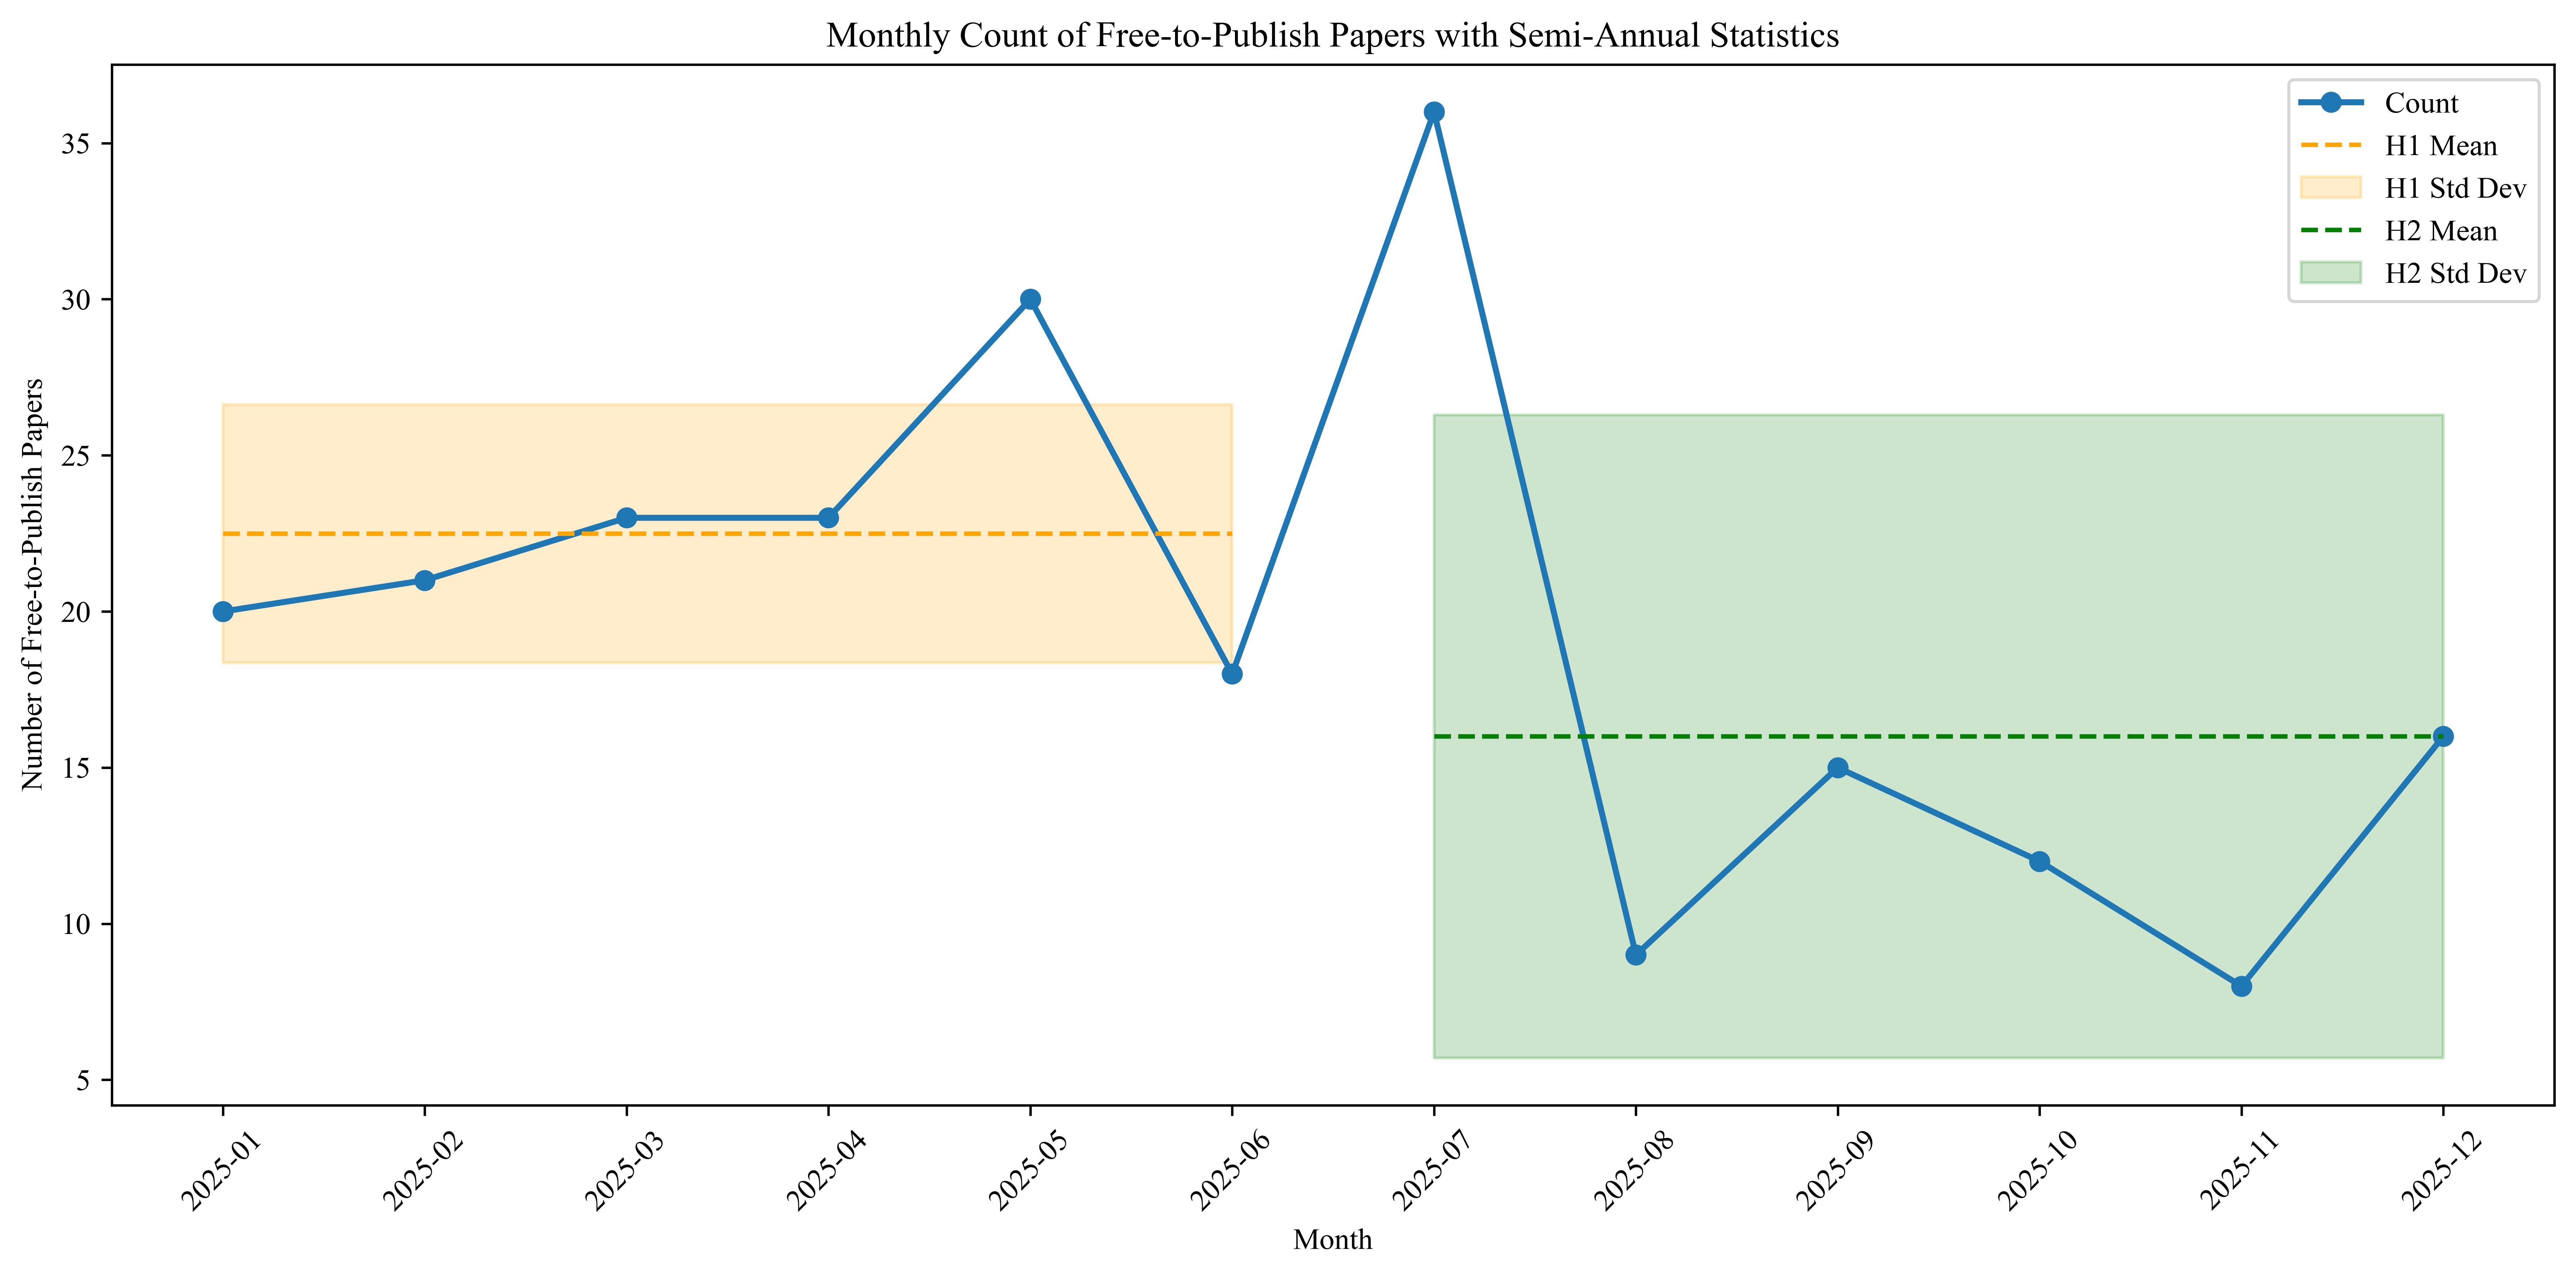

In [ ]:
# Monthly Bar Plot of Percentage of Free-to-Publish Papers relative to total journal publications
# Take month from date column
data['month'] = pd.to_datetime(data['date'], errors='coerce').dt.to_period('M')
monthly_stats = data[data['journal_flag'] == 1].groupby('month').agg(
    total_journal_papers=('published_journal', 'count'),
    free_to_publish_papers=('is_free_to_publish', 'sum')
).reset_index()

# Plotting only the count as a line
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the count line in blue
color_line = 'tab:blue'
ax.set_xlabel('Month')
ax.set_ylabel('Number of Free-to-Publish Papers', color='black') # Axis label color adjusted for single axis
ax.plot(monthly_stats['month'].astype(str), monthly_stats['free_to_publish_papers'], color=color_line, marker='o', linewidth=2, label='Count')
ax.tick_params(axis='y', labelcolor='black')
plt.xticks(rotation=45)

# Calculate statistics for the two halves of the year
# First half: Jan - Jun (first 6 months)
first_half = monthly_stats.iloc[:6]
mean1 = first_half['free_to_publish_papers'].mean()
std1 = first_half['free_to_publish_papers'].std()

# Second half: Jul - Dec (remaining months)
second_half = monthly_stats.iloc[6:]
mean2 = second_half['free_to_publish_papers'].mean()
std2 = second_half['free_to_publish_papers'].std()

# Plot first half average and std dev
x_labels = monthly_stats['month'].astype(str).tolist()
ax.hlines(y=mean1, xmin=0, xmax=5, colors='orange', linestyles='--', label='H1 Mean')
ax.fill_between(x=range(6), y1=mean1 - std1, y2=mean1 + std1, color='orange', alpha=0.2, label='H1 Std Dev')

# Plot second half average and std dev
ax.hlines(y=mean2, xmin=6, xmax=11, colors='green', linestyles='--', label='H2 Mean')
ax.fill_between(x=range(6, 12), y1=mean2 - std2, y2=mean2 + std2, color='green', alpha=0.2, label='H2 Std Dev')

plt.title('Monthly Count of Free-to-Publish Papers with Semi-Annual Statistics')
plt.legend()
plt.tight_layout()
plt.show()